## Introduction

Data is ubiquitous, and leveraging historical data for forecasting remains valuable as history often repeats itself. Knowing the title of a book is beneficial, but reading it is far more useful; similarly, data is essential in our analyses.

In this project, I have utilized well-known US stock tickers from ***2016/01/04 TO 2024/07/09*** almost 8 years, including Apple **(AAPL)**, Adobe **(ADBE)**, Amazon **(AMZN)**, Tesla **(TSLA)**, Nvidia **(NVDA)**, and Microsoft **(MSFT)**. The data was sourced from yFinance library in pyhton, a public and easily accessible platform that hosts realistic datasets. And the Financial Statments From Stock Analysis.

This project is structured around five key questions, each addressed in dedicated sections, and The Questions are
:

1.) What was the change in price and volume of each stock over time?

2.) What was the moving averages of the various stocks?

3.) What is the correlation between the stock and another?

4.) What is the financial health of each company, and what is the primary metric to focus on?

5.) How can we predict future stock behavior for each Stock using Time Series Anaylsis?

6.) How accurate are our results by utilizing statistical measures?


**The structure of the report is as follows:**

Pre_Section: Loading the Data

Section 1: Q1 Answer

Section 2: Q2 Answer 

Section 3: Q3 Answer 

Section 4: Q4 Answer

Section 5: Q5 Answer 

Section 6: Q6 Answer 

Conclusion

## Pre_Section: Loading the Tickers

In [5]:
# Imports

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the data from the Excel file
AAPL = pd.read_csv("D:/P2_Stocks/AAPL/AAPL.csv")
# Display the data
AAPL.head()


,date,close,Simple Moving Average_50,Exponential Moving Average_50,Simple Moving Average_100,Exponential Moving Average_100,Relative Strength Index 14,Daily_Return,volume,Moving Average Convergence Divergence
0,1/4/2016,23.91,26.08,25.58,25.72,25.99,30.42,0.001,270597600,-0.67
1,1/5/2016,23.32,26.03,25.49,25.69,25.94,29.37,-0.025,223164000,-0.72
2,1/6/2016,22.86,25.95,25.39,25.66,25.88,23.43,-0.020,273829600,-0.80
3,1/7/2016,21.89,25.86,25.25,25.62,25.80,21.41,-0.042,324377600,-0.94
4,1/8/2016,22.01,25.79,25.12,25.58,25.72,26.71,0.005,283192000,-1.02


In [6]:
ADBE = pd.read_csv("D:/P2_Stocks/ADBE/ADBE.csv")
# Display the data
ADBE.head()

,Date,Adj Close,Simple Moving Average_50,Exponential Moving Average_50,Simple Moving Average_100,Exponential Moving Average_100,Relative Strength Index 14,Daily_Return,Volume
0,1/4/2016,91.97,91.36,90.97,86.67,87.95,45.68,-0.021,2993800
1,1/5/2016,92.34,91.44,91.02,86.76,88.04,44.22,0.004,1821300
2,1/6/2016,91.02,91.51,91.02,86.82,88.10,34.15,-0.014,1674000
3,1/7/2016,89.11,91.51,90.95,86.85,88.12,32.89,-0.021,2717800
4,1/8/2016,87.85,91.51,90.83,86.87,88.11,36.93,-0.014,2263400


In [7]:
TSLA = pd.read_csv("D:/P2_Stocks/TSLA/TSLA.csv")
# Display the data
TSLA.head()

,Date,Close,Simple Moving Average_50,Exponential Moving Average_50,Simple Moving Average_100,Exponential Moving Average_100,Relative Strength Index 14,Daily_Return,Volume
0,1/4/2016,14.89,14.91,15.25,15.51,15.44,54.38,-0.069,102406500
1,1/5/2016,14.90,14.93,15.24,15.50,15.43,52.22,0.000,47802000
2,1/6/2016,14.60,14.94,15.21,15.49,15.42,32.25,-0.020,56686500
3,1/7/2016,14.38,14.94,15.18,15.47,15.40,30.65,-0.015,53314500
4,1/8/2016,14.07,14.94,15.13,15.44,15.37,29.54,-0.022,54421500


In [8]:
AMZN = pd.read_csv("D:/P2_Stocks/AMZN/AMZN.csv")
# Display the data
AMZN.head()

,Date,Close,Simple Moving Average_50,Exponential Moving Average_50,Simple Moving Average_100,Exponential Moving Average_100,Relative Strength Index 14,Daily_Return,Volume
0,1/4/2016,31.85,32.77,32.23,29.55,0.93,41.34,-0.058,186290000
1,1/5/2016,31.69,32.84,32.21,29.61,0.91,39.92,-0.005,116452000
2,1/6/2016,31.63,32.87,32.18,29.66,0.92,29.91,-0.002,106584000
3,1/7/2016,30.40,32.87,32.11,29.70,0.96,25.29,-0.039,141498000
4,1/8/2016,30.35,32.87,32.05,29.73,0.95,26.47,-0.001,110258000


In [9]:
MSFT = pd.read_csv("D:/P2_Stocks/MSFT/MSFT.csv", low_memory=False)
# Display the data
MSFT.head()

,Date,Adj Close,Simple Moving Average_50,Exponential Moving Average_50,Simple Moving Average_100,Exponential Moving Average_100,Relative Strength Index 14,Daily Returns,Volume
0,1/4/2016,48.52,48.05,47.40,43.75,45.16,47.72,-0.012,53778000
1,1/5/2016,48.74,48.18,47.45,43.83,45.23,49.02,0.005,34079700
2,1/6/2016,47.86,48.21,47.47,43.90,45.29,36.53,-0.018,39518900
3,1/7/2016,46.19,48.18,47.42,43.95,45.30,30.75,-0.035,56564900
4,1/8/2016,46.33,48.16,47.38,44.00,45.32,38.40,0.003,48754000


In [10]:
NVDA = pd.read_csv("D:/P2_Stocks/NVDA/NVDA.csv")
# Display the data
NVDA.head()

,Date,Close,Simple Moving Average_50,Exponential Moving Average_50,Simple Moving Average_100,Exponential Moving Average_100,Relative Strength Index 14,Daily_Return,Volume
0,1/4/2016,0.809,0.78,0.78,0.69,0.71,47.80,-0.018,358076000
1,1/5/2016,0.822,0.78,0.78,0.69,0.72,49.14,0.016,490272000
2,1/6/2016,0.788,0.79,0.78,0.69,0.72,35.91,-0.041,449344000
3,1/7/2016,0.757,0.79,0.78,0.70,0.72,31.81,-0.040,645304000
4,1/8/2016,0.741,0.79,0.78,0.70,0.72,31.24,-0.021,398472000


## Section 1: Q1 Answer

### 1.) What was the change in price and volume of each stock over time?

#### Combining Graphs Close Prices For All 6 Tickerts Together 

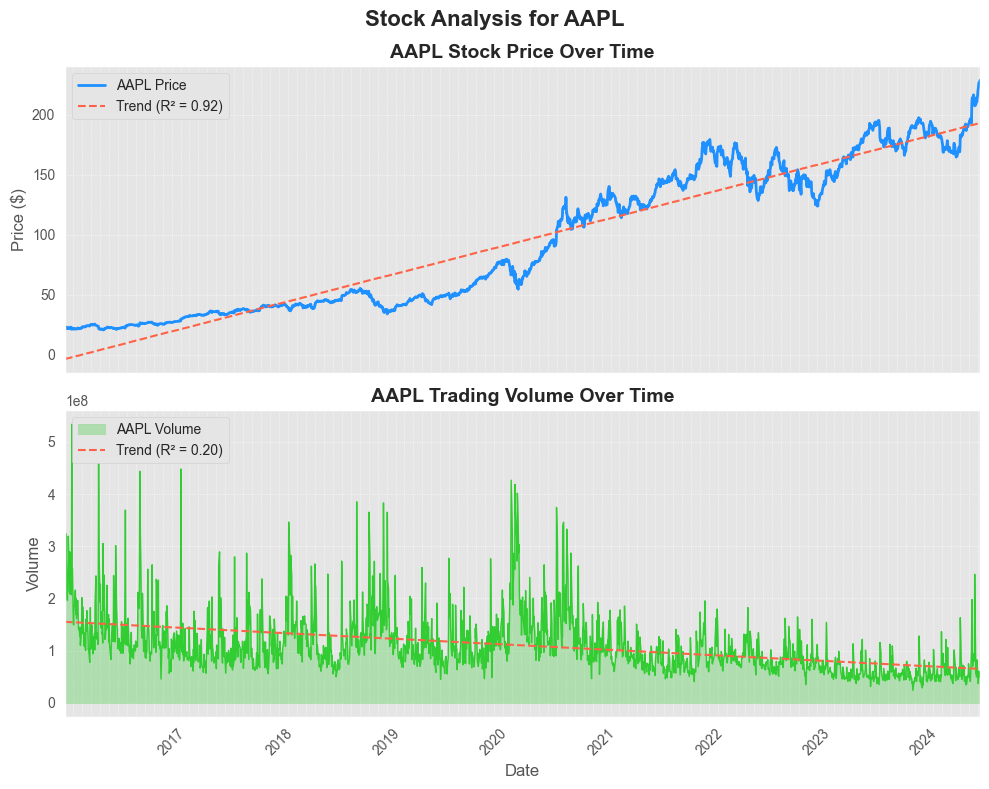

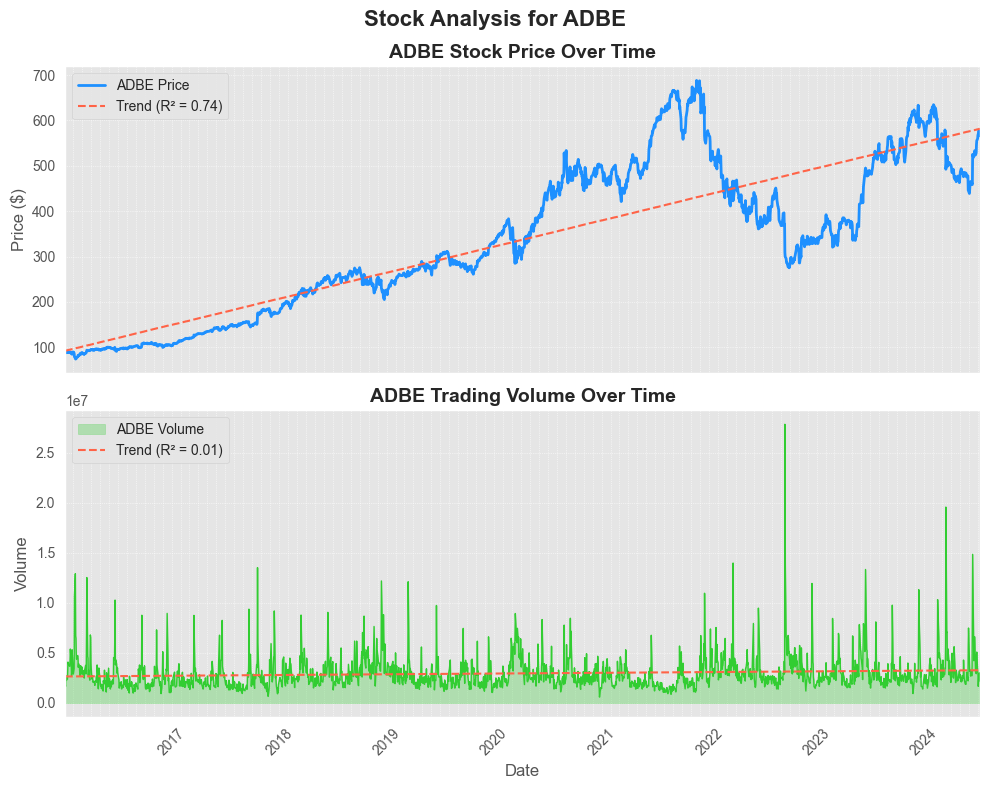

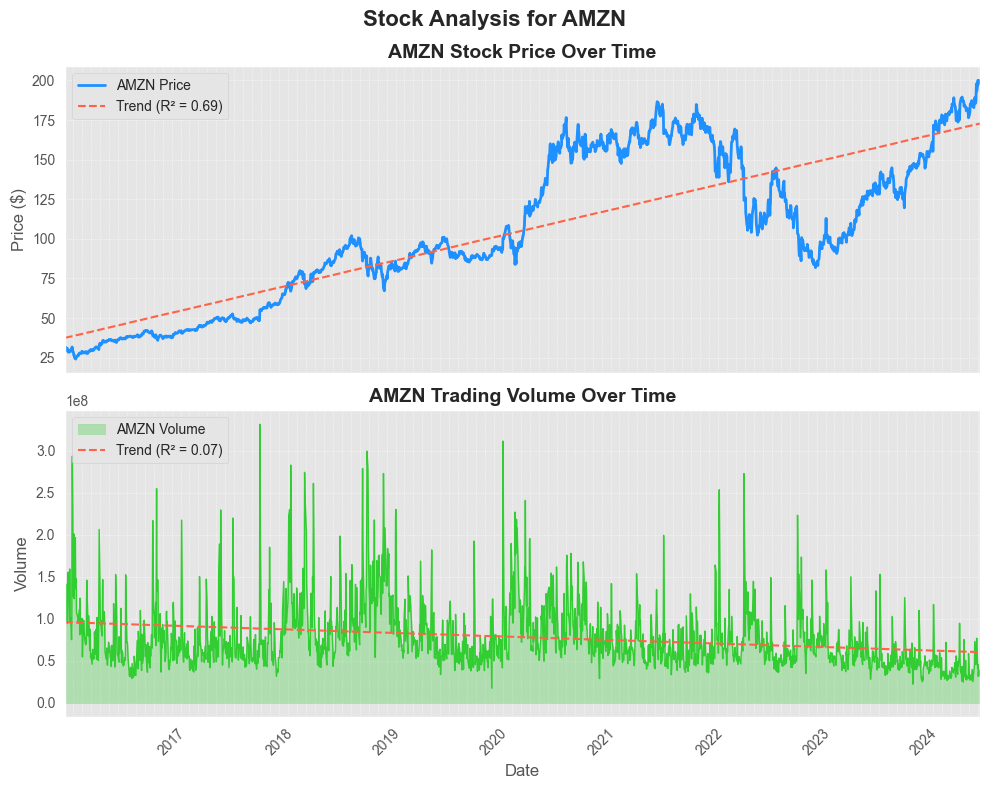

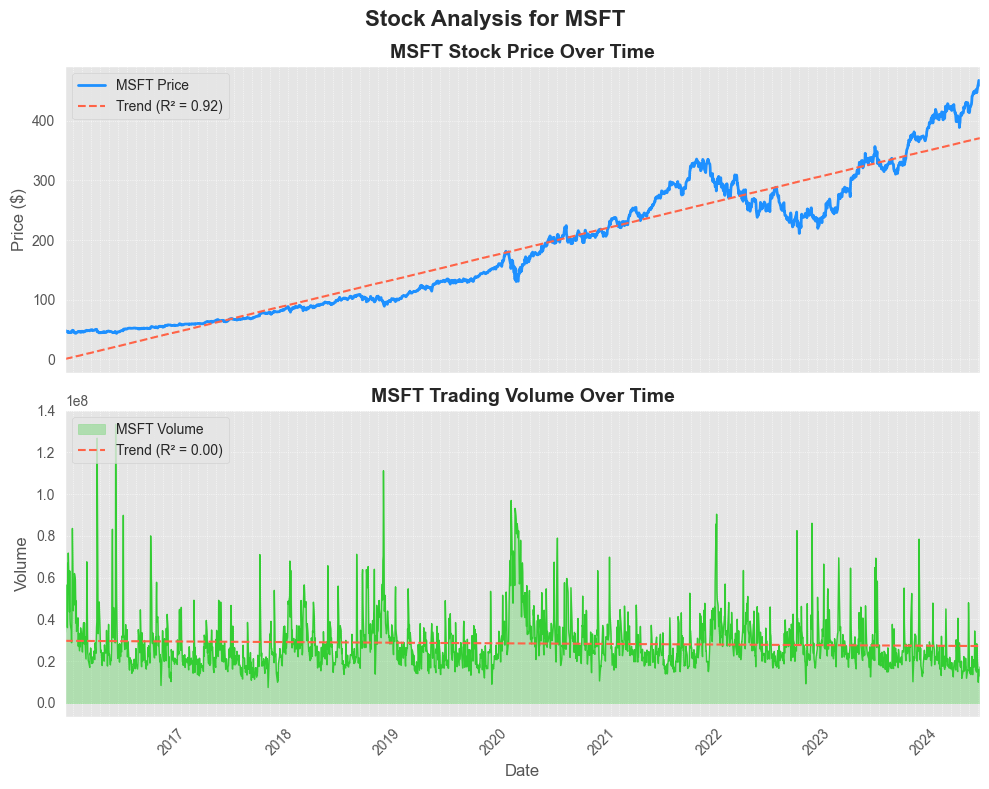

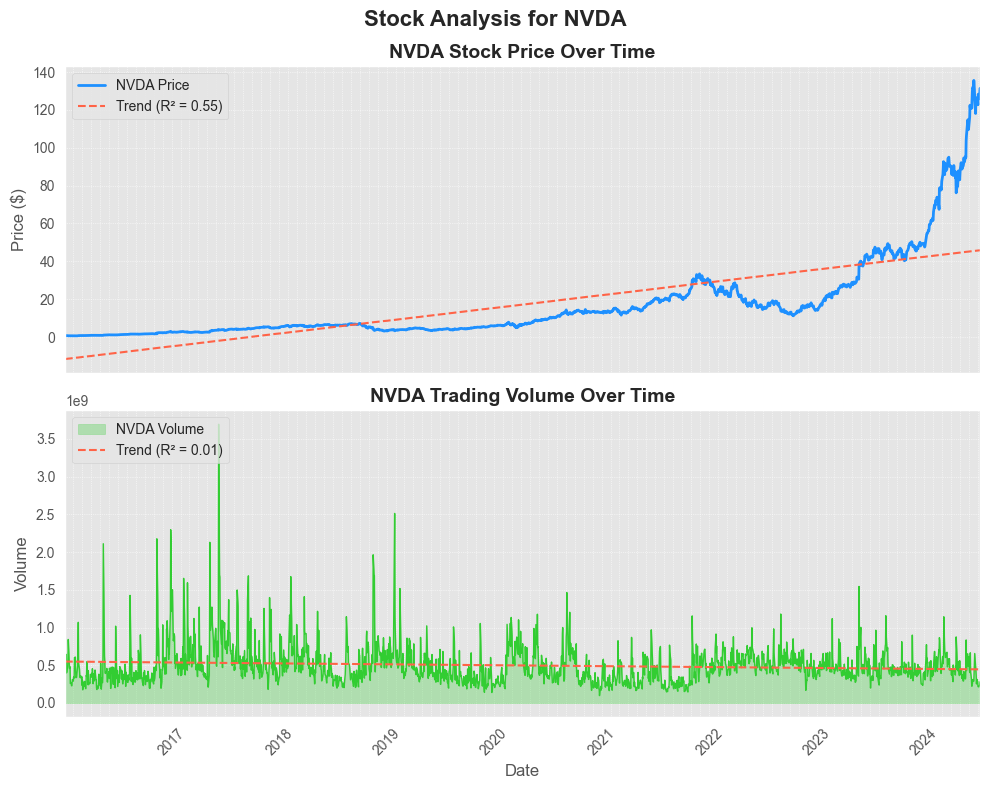

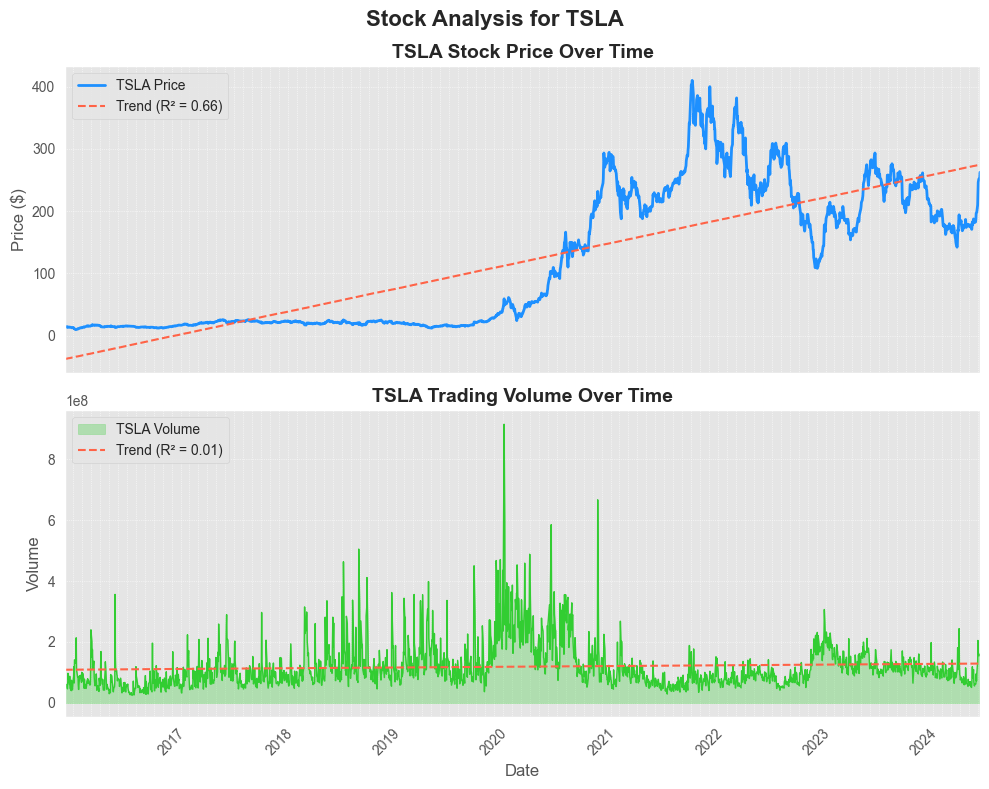

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats

def get_column_names(file_path):
    df = pd.read_csv(file_path, nrows=5)
    date_col = next((col for col in df.columns if 'date' in col.lower()), None)
    price_col = next((col for col in df.columns if 'close' in col.lower() or 'price' in col.lower()), None)
    volume_col = next((col for col in df.columns if 'volume' in col.lower()), None)
    if not all([date_col, price_col, volume_col]):
        print(f"Warning: Could not identify all required columns in {file_path}")
        print(f"Available columns: {df.columns.tolist()}")
    return date_col, price_col, volume_col

def plot_individual_trend_and_volume_graphs(file_paths, tickers):
    plt.style.use('ggplot')
    
    for ticker, file_path in zip(tickers, file_paths):
        date_column, price_column, volume_column = get_column_names(file_path)
        
        if not all([date_column, price_column, volume_column]):
            print(f"Skipping {ticker} due to missing column information")
            continue
        
        df = pd.read_csv(file_path, parse_dates=[date_column], low_memory=False)
        df = df.dropna(subset=[date_column, price_column, volume_column])
        df = df.sort_values(by=date_column)
        
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
        
        ax1.plot(df[date_column], df[price_column], label=f'{ticker} Price', color='#1e90ff', linewidth=2)
        
        x = np.arange(len(df))
        y = df[price_column]
        slope, intercept, r_value, _, _ = stats.linregress(x, y)
        line = slope * x + intercept
        ax1.plot(df[date_column], line, color='#ff6347', linestyle='--', label=f'Trend (R² = {r_value**2:.2f})')
        
        ax2.fill_between(df[date_column], df[volume_column], color='#32cd32', alpha=0.3, label=f'{ticker} Volume')
        ax2.plot(df[date_column], df[volume_column], color='#32cd32', linewidth=1)
        
        y = df[volume_column]
        slope, intercept, r_value, _, _ = stats.linregress(x, y)
        line = slope * x + intercept
        ax2.plot(df[date_column], line, color='#ff6347', linestyle='--', label=f'Trend (R² = {r_value**2:.2f})')
        
        for ax in (ax1, ax2):
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_minor_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
            ax.tick_params(axis='x', rotation=45, which='major')
            ax.set_xlim(left=df[date_column].min(), right=df[date_column].max())
            ax.grid(True, which='both', linestyle=':', linewidth=0.5)
            ax.legend(fontsize=10, loc='upper left')
        
        ax1.set_ylabel('Price ($)', fontsize=12)
        ax1.set_title(f'{ticker} Stock Price Over Time', fontsize=14, fontweight='bold')
        
        ax2.set_xlabel('Date', fontsize=12)
        ax2.set_ylabel('Volume', fontsize=12)
        ax2.set_title(f'{ticker} Trading Volume Over Time', fontsize=14, fontweight='bold')
        
        fig.suptitle(f'Stock Analysis for {ticker}', fontsize=16, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(f'{ticker}_analysis.png', format='png', dpi=300, bbox_inches='tight')
        plt.show()

# Our stock data
stocks = {
    "AAPL": "D:/P2_Stocks/AAPL/AAPL.csv",
    "ADBE": "D:/P2_Stocks/ADBE/ADBE.csv",
    "AMZN": "D:/P2_Stocks/AMZN/AMZN.csv",
    "MSFT": "D:/P2_Stocks/MSFT/MSFT.csv",
    "NVDA": "D:/P2_Stocks/NVDA/NVDA.csv",
    "TSLA": "D:/P2_Stocks/TSLA/TSLA.csv"
}

plot_individual_trend_and_volume_graphs(
    file_paths=list(stocks.values()),
    tickers=list(stocks.keys())
)


##### **VI. Definitions:**

##### Close Price:
*Definition*: The close price is the final price at which a security is traded on a given trading day.

*Usage*: It represents the **last transaction** price before the market closes.

*Significance*: Investors and analysts use the close price to **assess the daily performance** of a security and make trading decisions.


##### Adjusted Close Price:

Definition: The adjusted close price is the close price adjusted for any corporate actions that occurred before the next trading day.

Adjustments Include:

*Dividends*: Cash dividends paid out to shareholders are accounted for. The stock price typically drops by the dividend amount on the ex-dividend date.

*Stock Splits*: If a company splits its stock, increasing the number of shares while reducing the price per share proportionally, the adjusted close price reflects this change.

Other Corporate Actions: Such as *spin-offs*.

##### Trading volume:
it refers to the total number of shares or contracts traded for a specific security during a given period. This metric can be measured for different time frames, such as a single trading day, a week, a month, or any other period. Trading volume is a crucial indicator in financial markets because it provides insight into the activity and liquidity of a security.



#### **Conclusion** 

From the graphs, it appears that all the tickers have an upward trend, suggesting that the prices for each ticker might increase in the future. However, this alone is not sufficient to make informed decisions. We need to begin a detailed analysis, which will be covered in the upcoming sections.

Be patient, data often holds hidden insights, so let's endeavor to uncover some of them.

##### **What is about the Trading Volume for each Ticker and its relation with the price?**

You may have wondered about the benefits of visualizing trading volume and how it connects with the closing price. Let's discuss some insights, which, while not universally true, are often observed.

We have ***four scenarios***:

##### **1.) Price Increase with Increasing Volume**:

This indicates **strong buying interest** and can confirm an uptrend. High volume on price increases suggests that the price movement is supported by strong market participation.

##### **2.)Price Increase with Decreasing Volume**:

This might be a **warning sign** of a potential reversal. If the price is rising but the volume is decreasing, it suggests that **fewer investors are supporting the price increase**, indicating potential weakness.

##### **3.)Price Decrease with Increasing Volume**:

This indicates **strong selling interest** and can confirm a downtrend. High volume on price decreases suggests that the price movement is driven by significant selling pressure.

You may wonder why the price decreases in this scenario. It is due to the relationship between supply and demand. When investors have many shares they are willing to sell but there are not enough buyers, supply exceeds demand, leading to a decrease in price.

##### **4.)Price Decrease with Decreasing Volume**:

This can indicate a **lack of conviction** in the downtrend. If the price is falling but the volume is decreasing, it suggests that fewer investors are participating in the sell-off, indicating potential stabilization.

To clarify further: When a stock’s price is falling but the volume is also decreasing, it suggests that the intense selling pressure is diminishing. Fewer investors are participating in the sell-off, meaning that the downward movement is not strongly supported by a large number of sellers. As a result, the stock might be traded at a discount, and other investors may hold onto the stock in anticipation of a potential reversal or due to emotional biases.
_______________________________________________________________________________

After this preparation, we can perform an initial analysis by linking the two combined graphs together for each ticker.

Yes, it seems all trading volume trends for the tickers are stable **except for**:

*AAPL*: This categorizes in the second scenario (**warning sign**). It is better to analyze its financial health, as we will do later in the upcoming sections for all tickers.

*AMZN*: This categorizes in the first scenario (**strong buying interest**).

## Section 2: Q2 Answer


After analzying and identifying the trends for the stock price and its volume for each stock.

Now we want to analyze the Simple Moveing Average (SMA) and Exponential Moveing Average EMA movements to see how the stock price average trend over the Stock's life.

#### ***What is the difference between SMA and EMA?***

**Simple Moving Average (SMA):**

Definition: SMA smooths out price data by creating an average price over a specific number of periods. It assigns equal weight to all the prices in the period.
Trend Indication: A rising SMA indicates an uptrend, while a falling SMA indicates a downtrend.
Lagging Indicator: Due to its equal weighting, SMA tends to lag more compared to EMA.

**Exponential Moving Average (EMA):**

Definition: EMA gives more weight to recent prices, making it more responsive to new information compared to the SMA.

Trend Indication: Similar to SMA, but it reacts more quickly to price changes due to its weighting formula.

Lagging Indicator: EMA lags less than SMA, making it more sensitive to recent price movements.

*Importance of Analyzing SMA and EMA* => By analyzing the movements of SMA and EMA, you can better understand the stock price trends over the stock's life. The SMA provides a smoother, long-term perspective, while the EMA offers a more immediate reaction to recent price changes, allowing for timely trading decisions.

**Relative Strength Index (RSI):**

RSI measures the speed and change of price movements, oscillating between 0 and 100:

Overbought Condition: An RSI above 70 typically indicates overbought conditions, suggesting a potential sell opportunity.

Oversold Condition: An RSI below 30 indicates oversold conditions, suggesting a potential buy opportunity.

Divergence: Look for divergences between the RSI and price to spot potential reversals.

**Comprehensive Analysis Approach**
By analyzing MA, EMA, and RSI together, you can get a comprehensive view of the stock's trend, momentum, and potential reversal points. This multi-faceted approach enhances the reliability of trading signals and helps make more informed investment decisions.

So let's begin:

## Section 3: Q3 Answer


## Section 4: Q4 Answer 

## Section 5: Q5 Answer 

## Section 6: Q6 Answer 

## Conclusion